# 딥러닝 모델 구성 및 결과 검증

런타임 -> 런타임 유형 변경 -> GPU

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

60000 60000
10000 10000


In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
x_train[0].shape

(28, 28)

정규화 (0 ~ 255로 이루어진 데이터를 0 ~ 1 사이의 값으로 변경) 

In [6]:
x_train, x_test = x_train / 255.0, x_test / 255.0

그림 그리기

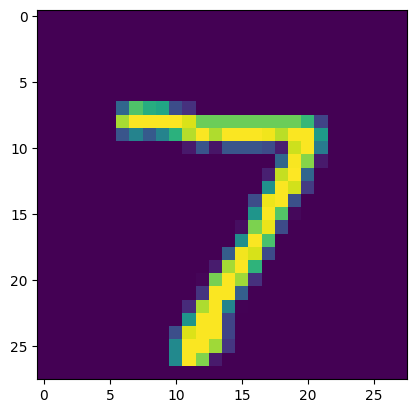

In [7]:
plt.imshow(x_test[0])

In [8]:
y_test[0]

7

모델 작성

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),    # 28 * 28 데이터를 한 줄짜리 데이터로 평평하게 펼침
    tf.keras.layers.Dense(128, activation='relu'),    # hidden layer, 128개로 이루어진 레이어, 활성화함수는 relu 사용 (input값이 0보다 작으면 0 출력, 0보다 크면 그 숫자 그대로 출력)
    tf.keras.layers.Dropout(0.2),                     # dropout=0.2는 학습을 하면서 20% 정도는 연결하지 않고 학습을 생략하는 것. (데이터가 불충분하더라도 옳게 학습되도록 하기 위해 사용)
    tf.keras.layers.Dense(10, activation='softmax')   # 츨력층, 0~9까지 10가지 숫자, 활성화함수는 softmax로 softmax는 카테고리 관련 문제에 주로 사용
    ])

model.compile(optimizer='adam',                       # optimizer = 학습의 효율을 높여 잘 되게 해주기 위해 사용하는 함수
              loss='sparse_categorical_crossentropy', # loss = 실제값과 예측값의 차이, loss 값을 어떤 방식으로 측정할 지에 대한 부분
              metrics=['accuracy'])                   # 정확도 확인

모델 시각화

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


모델 학습 및 평가

In [15]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 16s 7ms/step - loss: 0.2933 - accuracy: 0.9145
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1412 - accuracy: 0.9584
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1060 - accuracy: 0.9673
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0874 - accuracy: 0.9735
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0773 - accuracy: 0.9758


In [16]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0790 - accuracy: 0.9766 - 644ms/epoch - 2ms/step


[0.07895304262638092, 0.9765999913215637]